In [1]:
# Import TensorFlow into your program to get started
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

2023-02-03 15:29:14.360937: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


TensorFlow version: 2.10.0


In [2]:
#Load and prepare the MNIST dataset. The pixel values of the images range from 0 through 255. 
# Scale these values to a range of 0 to 1 by dividing the values by 255.0. 
# This also converts the sample data from integers to floating-point numbers

# link to the dataset: https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data
# link to the dataset description: https://en.wikipedia.org/wiki/MNIST_database

# TODO: modify the mnist dataset into the data_labeling csv file 

mnist = tf.keras.datasets.mnist


# Note that we separate the dataset into training and testing sets. Training sets are used to train the model, 
# whereas testing sets are used to evaluate the model.

# numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. => array

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0



In [18]:
y_train.shape

#[28 * 28] => 0-9

(60000,)

In [4]:
# Build a tf.keras.Sequential model

# Sequential is useful for stacking layers where each layer has one input 
# tensor and one output tensor. Layers are functions with a known mathematical 
# structure that can be reused and have trainable variables. Most TensorFlow models are composed of layers. This model uses the Flatten, Dense, and Dropout layers.
# For each example, the model returns a vector of logits or log-odds scores, one for each class

# More info on the Sequential model: https://www.tensorflow.org/api_docs/python/tf/keras/Sequential

# Play around with the model to see how it affects the accuracy of the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),  # if we change it to softmax, the result returns probabilities
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

2023-02-03 15:29:19.312929: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


What is a flatten layer? Given each input with dimensionality of 28*28, we flatten the input into (28*28, 1), which is (784,1). We usually need to start a Sequential model by adding a flatten layer, as sequential models cannot handle 2D data. 

What is a dense layer? Dense layer is a fully connected layer. It is a layer where each neuron is connected to every neuron in the next layer. The first parameter is the number of neurons in the layer. The second parameter is the activation function. By default it is linear activation function.

What is the softmax activation function? Softmax activation function is used in the last layer of a classification model. It is used to convert the output of the model into a probability distribution. The output of the softmax activation function is a vector of probabilities that sum to 1. The probability of each class is proportional to the exponent of the output of the model for that class.

What is the loss function? Loss function is used to measure how well the model is performing. The loss function is used to calculate the error of the model. The loss function is used to update the weights of the model. The loss function is used to calculate the gradient of the model. The loss function is used to calculate the gradient of the model.

What is Dropout layer? Dropout layer is used to prevent overfitting. It randomly drops some of the neurons in the layer. The dropout rate is the fraction of the neurons that are dropped. The dropout rate is usually between 0.2 and 0.5.

In [5]:
# this is the result of the prediction coming from the model before the softmax function is applied. 
# Note that right now each value is a logit

predictions = model(x_train[:1]).numpy()
predictions

array([[-0.18884657, -0.00089198,  0.20946504,  0.2208652 ,  0.47615317,
        -0.23730028,  0.5950209 , -0.46357635, -0.25529772,  0.28054345]],
      dtype=float32)

In [6]:
tf.nn.softmax(predictions).numpy()

array([[0.07361552, 0.08883764, 0.10963619, 0.11089321, 0.14314465,
        0.07013362, 0.1612125 , 0.05593142, 0.06888268, 0.11771259]],
      dtype=float32)

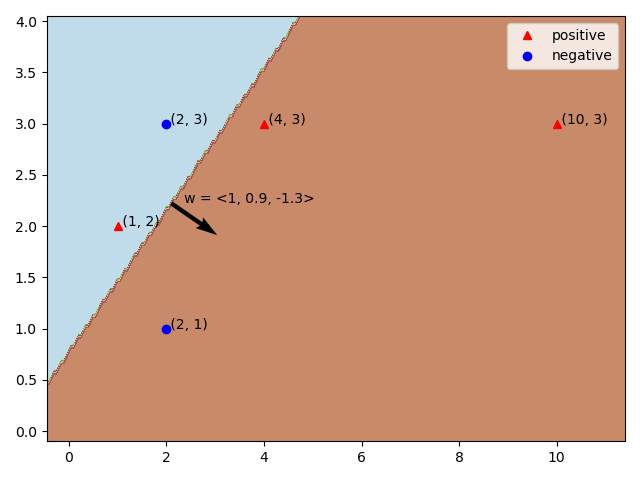

Consider the linear classifier with the weights and decision boundary above. Define $g({\bf x}) =  {\bf w}^\top {\bf x}$. We'll define our classification prediction $h({\bf X}) = \text{sign}(g({\bf X}))$. Using the parameters $\mathbf{w} = \langle 1, 0.9, -1.3 \rangle$ shown above, we can calculate $g(X)$ and $h(X)$ as:

$\begin{array}{c r r r}
{\bf X} & y & g({\bf X}) & h({\bf X}) \\
\hline
(1, 2) &  1  & -0.7 &  -1 \\
(2, 1) &  -1 & 1.5  &  1   \\
(2, 3) &  -1 & -1.1 &  -1  \\
(4, 3) &  1  & 0.7  &  1   \\
(10, 3)&  1  & 6.1  &  1 
\end{array}$

Using our $g({\bf X})$ definition above, we can define each loss as the following:

1. Perceptron (zero-one) loss:

$L(x, y) = \begin{cases}
0 & \text{if } y \cdot g({\bf x}) > 0 \\
1 & \text{otherwise} 
\end{cases} \\[2em]$

2. Squared error loss:

$L(x, y) = (y - g({\bf x}))^2 \\[2em]$

3. Binary cross-entropy loss (written in an atypical way):

$L(x, y) = \begin{cases}
\ln\left(1 + \exp(-g({\bf x}))\right) & \text{ if } y > 0 \\
\ln\left(1 + \exp(g({\bf x}))\right) & \text{ if } y < 0
\end{cases} \\[2em]$

4. Hinge loss:

$L(x, y) = \max\left(0, 1 - y \cdot g({\bf x})\right) \\[1em]$

In [7]:
# note that this is a function. Given the label and the logit results, it returns the loss
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [8]:
# Take in the predictions as well as the true labels (y_train[:1]) and return the loss
# What is :1? It means that we are taking the first element of the array. 
# :N means that we are taking the first N elements of the array

loss_fn(y_train[:1], predictions).numpy()

2.657353

In [9]:
# Before you start training, configure and compile the model using Keras Model.
# compile. Set the optimizer class to adam, set the loss to the loss_fn function you defined earlier, 
# and specify a metric to be evaluated for the model by setting the metrics parameter to accuracy

# What is the optimizer? Optimizer is used to update the weights of the model. 
# The optimizer is used to minimize the loss function, update the weights of the model. 
# By defualt, we use the Adam optimizer.

# We are using the loss function we defined earlier in this tutorial, but we can definitely use other loss functions.
# For example, we can use the mean squared error loss function.

# What is the metric? Metric is used to evaluate the model. Common metrics are accuracy, precision, recall, etc. 
# Most likely, we will use accuracy.

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [19]:
# Use the Model.fit method to adjust your model parameters and minimize the loss
# What is the batch size? The batch size is the number of samples that will be propagated through the network.
# What is the epoch? An epoch is an iteration over the entire x and y data provided. 

# The lower the loss, the better the model is.
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0657 - accuracy: 0.9790
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0594 - accuracy: 0.9807
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0536 - accuracy: 0.9824
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0482 - accuracy: 0.9843
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0457 - accuracy: 0.9846
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0402 - accuracy: 0.9863
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0395 - accuracy: 0.9867
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0373 - accuracy: 0.9874
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0348 - accuracy: 0.9882
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.033

In [12]:
# The Model.evaluate method checks the model's performance, usually on a validation set or test set
model.evaluate(x_test,  y_test, verbose=2)

model

313/313 - 0s - loss: 0.0719 - accuracy: 0.9780 - 380ms/epoch - 1ms/step


[0.07188404351472855, 0.9779999852180481]

In [13]:
# Note that the previous model returns a definite value for each class. However, sometimes we do not want that. 
# Instead, we can return the probability of each class.

probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[7.05428960e-09, 9.48585210e-09, 1.86366071e-06, 4.03857521e-05,
        4.41727644e-12, 4.64962602e-09, 1.82581679e-13, 9.99956608e-01,
        1.69038060e-07, 9.58419491e-07],
       [1.02887358e-10, 1.94808945e-05, 9.99977708e-01, 2.58005230e-06,
        2.66137587e-17, 1.53782835e-07, 9.18611076e-10, 1.75727149e-13,
        8.99869121e-08, 4.31016171e-13],
       [2.62120512e-08, 9.99041021e-01, 1.30361019e-04, 4.87186935e-06,
        4.08142523e-06, 4.58735167e-06, 3.74684805e-06, 7.84236589e-04,
        2.67430260e-05, 1.36973654e-07],
       [9.98627186e-01, 1.09532206e-08, 9.27403453e-04, 2.14001943e-06,
        9.08784273e-07, 8.20433979e-06, 1.10326568e-04, 6.06158501e-05,
        2.02909814e-06, 2.61238776e-04],
       [2.76222409e-06, 5.08965058e-11, 4.77792310e-06, 9.60363522e-09,
        9.97204244e-01, 4.01308762e-06, 1.01567375e-05, 4.74224507e-05,
        2.04912544e-06, 2.72452552e-03]], dtype=float32)>